In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from preprocessors import x_cord_contour, makeSquare, resize_to_pixel

from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.utils import plot_model
import matplotlib.image as mpimg

classifier = load_model('mnist_simple_cnn.h5')

Using TensorFlow backend.


### Training Simple MNIST Model

In [2]:
# load the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

In [3]:
# Store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

In [4]:
# Original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [5]:
# Shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [6]:
# Normalizing data to (0,1)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train /= 255.
x_test /= 255.

In [7]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# One hot encode outputs
y_train_oh = np_utils.to_categorical(y_train)
y_test_oh = np_utils.to_categorical(y_test)

In [9]:
num_classes= y_test_oh.shape[1]
print ("Number of Classes: " + str(num_classes))

Number of Classes: 10


In [10]:
# create model
def convnet():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax'),
        ])
    return model

In [11]:
# Training Parameters
batch_size = 128
epochs = 5
adam = Adam(lr=0.001)

In [12]:
model = convnet()
model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [14]:
history = model.fit(x_train, y_train_oh,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_oh))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 27s 452us/step - loss: 0.2427 - acc: 0.9270 - val_loss: 0.0538 - val_acc: 0.9824
Epoch 2/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.0860 - acc: 0.9748 - val_loss: 0.0375 - val_acc: 0.9866
Epoch 3/5
60000/60000 [==============================] - 20s 342us/step - loss: 0.0653 - acc: 0.9803 - val_loss: 0.0343 - val_acc: 0.9886
Epoch 4/5
60000/60000 [==============================] - 20s 329us/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.0313 - val_acc: 0.9894
Epoch 5/5
60000/60000 [==============================] - 20s 328us/step - loss: 0.0466 - acc: 0.9853 - val_loss: 0.0269 - val_acc: 0.9915


In [15]:
scores = model.evaluate(x_test, y_test_oh, batch_size=256, verbose=1)
print('\nTest result: %.3f loss: %.3f' %(scores[1]*100,scores[0]))

10000/10000 [==============================] - 1s 95us/step

Test result: 99.150 loss: 0.027


In [16]:
model.save('mnist_simple_cnn.h5')

In [17]:
y_pred = model.predict(x_test)

In [18]:
y_pred_label = np.argmax(y_pred, axis=1)

In [19]:
labels = {0: "0",
          1: "1",
          2: "2",
          3: "3",
          4: "4",
          5: "5",
          6: "6",
          7: "7",
          8: "8",
          9: "9"}

## Confusion Matrix

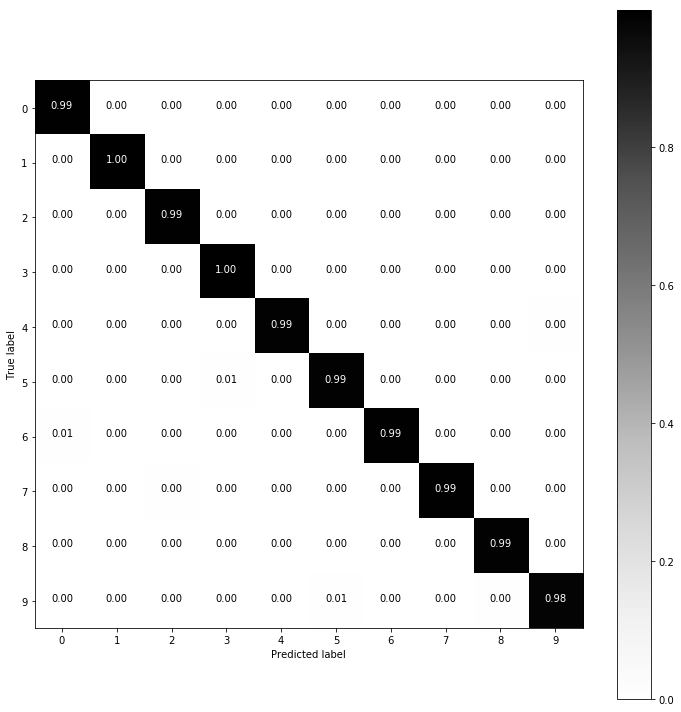

In [20]:
import itertools
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_label)
cm = cnf_matrix.astype('float32')/cnf_matrix.sum(axis=1)
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greys)
tick_marks = np.arange(10)
plt.xticks(tick_marks, [labels[i] for i in range(10)])
plt.yticks(tick_marks, [labels[i] for i in range(10)])
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.grid(False)
plt.show()

## Training, Validation Plots

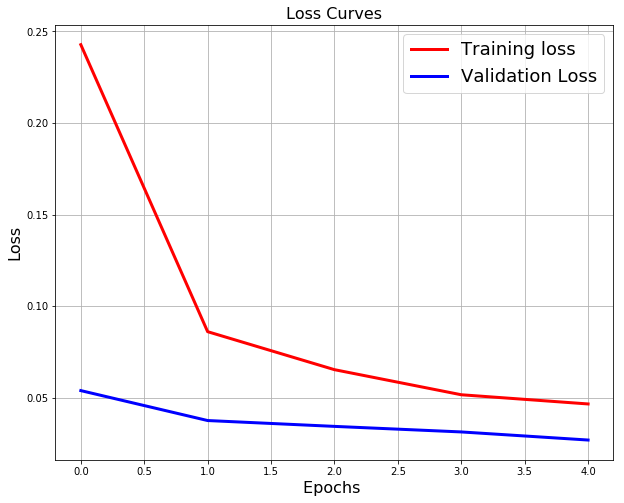

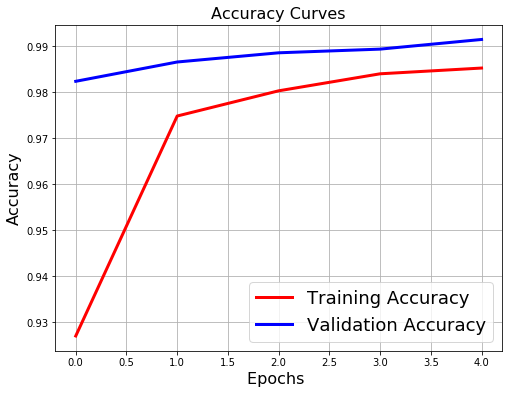

In [21]:
# Loss Curves
plt.figure(figsize=[10,8])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.grid()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16);


# Testing MNIST Model

In [22]:
classifier = load_model('mnist_simple_cnn.h5')

def draw_test(name, pred, input_im):
    # For Black Background
    BLACK = [0,0,0] 
    # For Border
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK) 
    # Convert image to BGR
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR) 
    # To display image and Prediction Text
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2) 
    cv2.imshow(name, expanded_image)

for i in range(0,10):
    # Random 10 images from test dataset
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    
    #Resize test image 
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 
    
    # Get Prediction on model
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

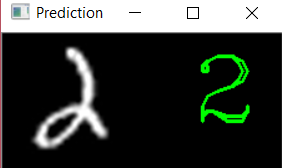


### Testing our classifier on real image

In [23]:
image = cv2.imread('images/numbers.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2.imshow("image", image)
cv2.waitKey(0)

# Blur image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Find edges
edged = cv2.Canny(blurred, 30, 150)

# Find Contours
_,contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Sort out contours left to right by using their x cordinates
contours = sorted(contours, key = x_cord_contour, reverse = False)

# Create empty array to store entire number
full_number = []

    # loop over the contours
for c in contours:
    # compute the bounding box for the rectangle
    (x, y, w, h) = cv2.boundingRect(c)    

    if w >= 5 and h >= 25:
        roi = blurred[y:y + h, x:x + w]
        ret, roi = cv2.threshold(roi, 127, 255,cv2.THRESH_BINARY_INV)
        roi = makeSquare(roi)
        roi = resize_to_pixel(28, roi)
        cv2.imshow("ROI", roi)
        roi = roi / 255.0       
        roi = roi.reshape(1,28,28,1) 

        ## Get Prediction
        res = str(classifier.predict_classes(roi, 1, verbose = 0)[0])
        full_number.append(res)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.putText(image, res, (x , y + 155), cv2.FONT_HERSHEY_COMPLEX, 2, (255, 0, 0), 2)
        cv2.imshow("image", image)
    cv2.waitKey(0) 

cv2.destroyAllWindows()
print ("The number is: " + ''.join(full_number))

The number is: 13540


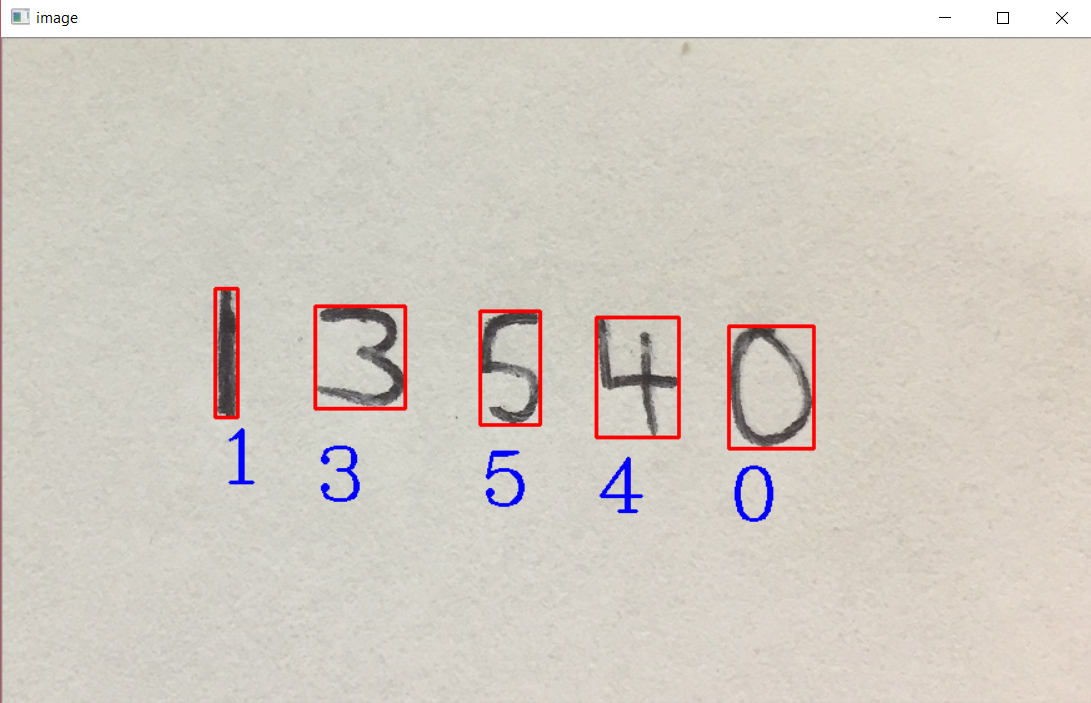

## Generating the diagram of the model 

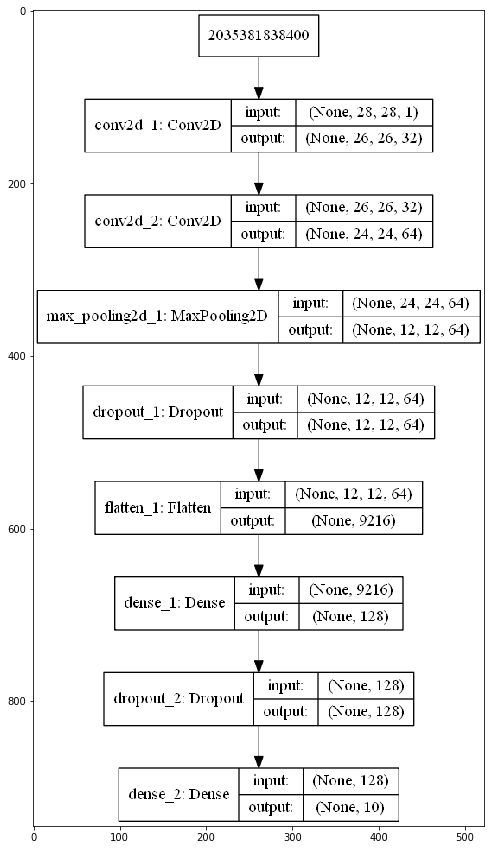

In [24]:
# Generate the plot
plot_model(model, to_file ='model_plot_cnn.png',
           show_shapes = True,
           show_layer_names = True)

# Show the plot here
img = mpimg.imread('model_plot_cnn.png')
plt.figure(figsize=(30,15))
imgplot = plt.imshow(img) 